In [ ]:
!pip install mplfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

In [ ]:
!pip install chart_studio
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
import cufflinks as cf # Connects Plotly to Pandas
# Makes Plotly work in our Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import requests # Get URL data
from bs4 import BeautifulSoup # To Manipulate URL data
import json
from pandas import DataFrame as df

Once we import the libraries. We will be Getting Data From URL

In [ ]:
web_page = requests.get("https://www.worldometers.info/coronavirus")
soup = BeautifulSoup(web_page.text, 'html.parser') #allows to manipulate the data received. We want the text format
print(soup.prettify())
print(web_page.text, file=open('response.txt', 'w')) #saved to a file

In [ ]:
# Find basic data in div with class name maincounter-number
covid_data = soup.find_all("div",class_ ="maincounter-number" )
print(covid_data) #data extracted
print("Total Coronavirus Cases Reported:",covid_data[0].text.strip())
print("Total Confirmed Deaths:",covid_data[1].text.strip())
print("Total Recovered Cases:",covid_data[2].text.strip())

[<div class="maincounter-number">
<span style="color:#aaa">704,753,890        </span>
</div>, <div class="maincounter-number">
<span>7,010,681</span>
</div>, <div class="maincounter-number" style="color:#8ACA2B ">
<span>675,619,811</span>
</div>]
Total Coronavirus Cases Reported: 704,753,890
Total Confirmed Deaths: 7,010,681
Total Recovered Cases: 675,619,811


In [ ]:
# Search for table with id main_table_countries_today
results = soup.find(id='main_table_countries_today')
# Print all tds
content = results.find_all('td')
# content

In [ ]:
clean_data = ""
for data in content:
    clean_data = clean_data+ data.text.strip() + "|" #pipe separator
# Geting rid of pluses
clean_data = clean_data.replace("+", "")
# Geting rid of N/A
clean_data = clean_data.replace("N/A", "0")
clean_data

'|North America|131,889,132||1,695,941||127,665,129|350|2,528,062|6,095||||||North America||||||||Asia|221,500,265||1,553,662||205,673,091||14,273,512|14,733||||||Asia||||||||Europe|253,406,198||2,101,824||248,754,104|474|2,550,270|4,453||||||Europe||||||||South America|70,200,879||1,367,332||66,683,585||2,149,962|8,953||||||South America||||||||Oceania|14,895,771||33,015||14,752,388||110,368|31||||||Australia/Oceania||||||||Africa|12,860,924||258,892||12,090,808||511,224|529||||||Africa|||||||||721||15||706||0|0||||||||||||||World|704,753,890|0|7,010,681|0|675,619,811|790|22,123,398|34,794|90,413|899.4||||All|||||||1|USA|111,820,082||1,219,487||109,814,428||786,167|940|333,985|3,642|1,186,851,502|3,544,901|334,805,269|North America|3|275|0|||2,348|2|India|45,035,393||533,570||0|0|0|0|32,016|379|935,879,495|665,334|1,406,631,776|Asia|31|2,636|2|||0.4|3|France|40,138,560||167,642||39,970,918||0||612,013|2,556|271,490,188|4,139,547|65,584,518|Europe|2|391|0||||4|Germany|38,828,995||183,0

Working With Regular Expressions (Regex)

In [ ]:
import re

# Got a list of countries from the website
countries = [
    'usa', 'spain', 'italy', 'france', 'germany', 'uk', 'turkey', 'iran',
    'russia', 'brazil', 'canada', 'belgium', 'netherlands', 'switzerland',
    'india', 'peru', 'portugal', 'ecuador', 'ireland', 'sweden', 'saudi-arabia',
    'israel', 'austria', 'mexico', 'singapore', 'japan', 'chile', 'pakistan',
    'poland', 'romania', 'belarus', 'qatar', 'south-korea', 'united-arab-emirates',
    'indonesia', 'ukraine', 'denmark', 'serbia', 'philippines', 'norway',
    'czech-republic', 'australia', 'dominican-republic', 'bangladesh', 'malaysia',
    'panama', 'colombia', 'finland', 'south-africa', 'egypt', 'morocco', 'argentina',
    'luxembourg', 'moldova', 'algeria', 'kuwait', 'thailand', 'kazakhstan',
    'bahrain', 'hungary', 'greece', 'oman', 'croatia', 'uzbekistan', 'iraq',
    'armenia', 'iceland', 'afghanistan', 'estonia', 'azerbaijan', 'cameroon',
    'bosnia-and-herzegovina', 'ghana', 'new-zealand', 'lithuania', 'slovenia',
    'macedonia', 'slovakia', 'cuba', 'bulgaria', 'nigeria', 'cote-d-ivoire',
    'china-hong-kong-sar', 'djibouti', 'guinea', 'bolivia', 'tunisia', 'latvia',
    'cyprus', 'andorra', 'albania', 'lebanon', 'niger', 'kyrgyzstan', 'costa-rica',
    'senegal', 'honduras', 'burkina-faso', 'uruguay', 'sri-lanka', 'san-marino',
    'channel-islands', 'guatemala', 'georgia', 'democratic-republic-of-the-congo',
    'malta', 'jordan', 'somalia', 'taiwan', 'reunion', 'mayotte', 'mali', 'kenya',
    'jamaica', 'state-of-palestine', 'mauritius', 'venezuela', 'el-salvador',
    'montenegro', 'isle-of-man', 'tanzania', 'viet-nam', 'equatorial-guinea',
    'sudan', 'paraguay', 'maldives', 'congo', 'rwanda', 'faeroe-islands', 'gabon',
    'martinique', 'guadeloupe', 'myanmar', 'gibraltar', 'brunei-darussalam',
    'liberia', 'ethiopia', 'madagascar', 'cambodia', 'trinidad-and-tobago',
    'french-guiana', 'bermuda', 'cabo-verde', 'aruba', 'togo', 'monaco',
    'sierra-leone', 'zambia', 'liechtenstein', 'bahamas', 'barbados', 'uganda',
    'mozambique', 'sint-maarten', 'guyana', 'haiti', 'cayman-islands', 'benin',
    'libya', 'swaziland', 'french-polynesia', 'guinea-bissau', 'nepal', 'chad',
    'china-macao-sar', 'syria', 'eritrea', 'saint-martin', 'mongolia', 'malawi',
    'zimbabwe', 'angola', 'antigua-and-barbuda', 'timor-leste', 'botswana',
    'central-african-republic', 'laos', 'belize', 'fiji', 'grenada', 'new-caledonia',
    'curacao', 'dominica', 'namibia', 'saint-kitts-and-nevis', 'saint-lucia',
    'saint-vincent-and-the-grenadines', 'nicaragua', 'falkland-islands-malvinas',
    'burundi', 'montserrat', 'turks-and-caicos-islands', 'greenland', 'seychelles',
    'gambia', 'suriname', 'holy-see', 'papua-new-guinea', 'mauritania', 'bhutan',
    'british-virgin-islands', 'saint-barthelemy', 'south-sudan', 'western-sahara',
    'caribbean-netherlands', 'sao-tome-and-principe', 'anguilla', 'saint-pierre-and-miquelon',
    'yemen', 'china'
]

# Cycle through countries
for c in countries:
    # Add country name plus look for all , | and any numbers that follow
    pattern = c+"[,|\d]*"
    # Search for the pattern and ignore case so I don't have to worry about
    # country capitalization
    data = re.search(pattern, clean_data, re.IGNORECASE)
    # If data is a NoneType ignore it
#     if data is not None:
#         print(data.group())

For One Country India

In [ ]:
data = re.search('India[,|\d]*', clean_data, re.IGNORECASE)
india=data.group()
#for row usa, i want the text values separated by | to be the values for the other cols
india_val=india.split('|')
india_val
# remove empty strings from usa_val
india_cleaned = []
for i in india_val:
  if i != '':
    india_cleaned.append(i)
india_cleaned

['India',
 '45,035,393',
 '533,570',
 '0',
 '0',
 '0',
 '0',
 '32,016',
 '379',
 '935,879,495',
 '665,334',
 '1,406,631,776']

For Available Countries

In [ ]:
# Cycle through countries
real_data = dict()
for c in countries:
    # Add country name plus look for all , | and any numbers that follow
    pattern = c+"[,|\d]*"
    # Search for the pattern and ignore case so I don't have to worry about
    # country capitalization
    data = re.search(pattern, clean_data, re.IGNORECASE)
    if data is not None:
      useful_data =data.group()
      useful_data = useful_data.split('|')
      for x in useful_data:
        if x != '':
          key = useful_data[0]
          real_data[key] = useful_data[1:]


Using above code with the Loops, we can get all the data in a dictionary, format. We can then transform all into a dataframe, with help of Panadas. For this project, there is already a CSV file available for data analysis, so we will be using the CSV file going forward

In [ ]:
# Import Our World in Data CSV
#ourworldindata.org/covid-cases

In [ ]:
owid_df = pd.read_csv('owid-covid-data.csv')
owid_df.head()
owid_df.columns # checking the columns available
# checking countries
print("Total unique countries:",len(owid_df['location'].unique()))

Total unique countries: 214


In [ ]:
usa_df = owid_df[owid_df['location'] == 'United States']
usa_df = usa_df[['date','total_cases']]
usa_df.set_index('date',inplace=True)
usa_df=usa_df.dropna()
usa_df.head(10)

,total_cases
date,
2020-01-21,1.0
2020-01-22,1.0
2020-01-23,1.0
2020-01-24,1.0
2020-01-25,2.0
2020-01-26,2.0
2020-01-27,5.0
2020-01-28,5.0
2020-01-29,5.0


In [ ]:
usa_df['30_day_moving_avg'] = usa_df['total_cases'].rolling(window=30).mean()

In [ ]:
usa_df

,total_cases,30_day_moving_avg
date,,
2020-01-21,1.0,NaN
2020-01-22,1.0,NaN
2020-01-23,1.0,NaN
2020-01-24,1.0,NaN
2020-01-25,2.0,NaN
...,...,...
2020-10-23,8408340.0,7.616224e+06
2020-10-24,8493669.0,7.668206e+06
2020-10-25,8576725.0,7.721483e+06


<Axes: xlabel='date'>

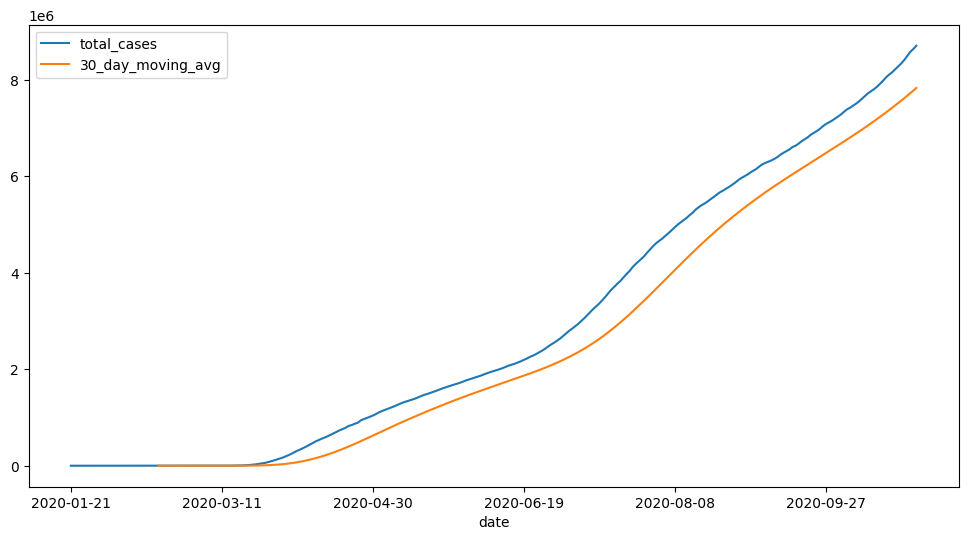

In [ ]:
usa_df['total_cases'].plot(figsize=(12,6),legend='total cases')

# Plot a 30 day moving average
usa_df['30_day_moving_avg'].plot(legend ='30 day moving average')

This shows that the number of cases is growing above the average. Which is a case of Concern.
1. If the Blue Line (total cases) come under the orange line (average) then it indicates that things are getting better
2. If the Blue Line (total cases) stays over the orange line (average) then it indicates that things are getting worse

Do lockdowns work?

In [ ]:
owid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [ ]:
#Custom Function
def plot_covid_data(country, col, plot_ma=False, y_max=200):
  country_df =  owid_df[owid_df['location'] == country]
  country_df = country_df[['date',col]]
  country_df=country_df.dropna()
  country_df.set_index('date',inplace=True)
  country_df[col].plot(figsize=(12,6),legend='total cases',ylim=[0,y_max])
  plt.title(country)

  if plot_ma:
    country_df['30_day_moving_avg'] = country_df[col].rolling(window=30).mean()
    country_df['30_day_moving_avg'].plot(legend ='30 day moving average')


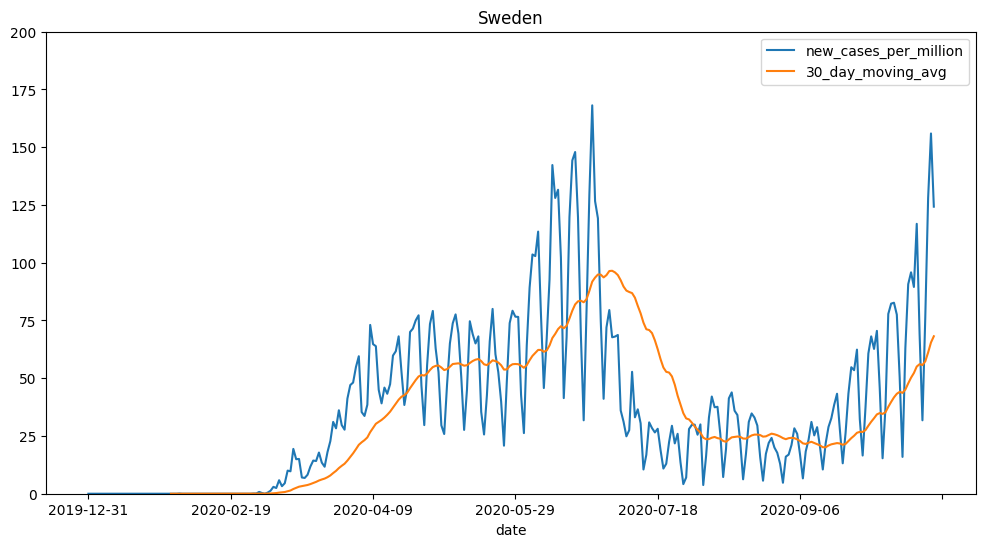

In [ ]:
# Least restrictive lockdown
plot_covid_data('Sweden', 'new_cases_per_million', True)

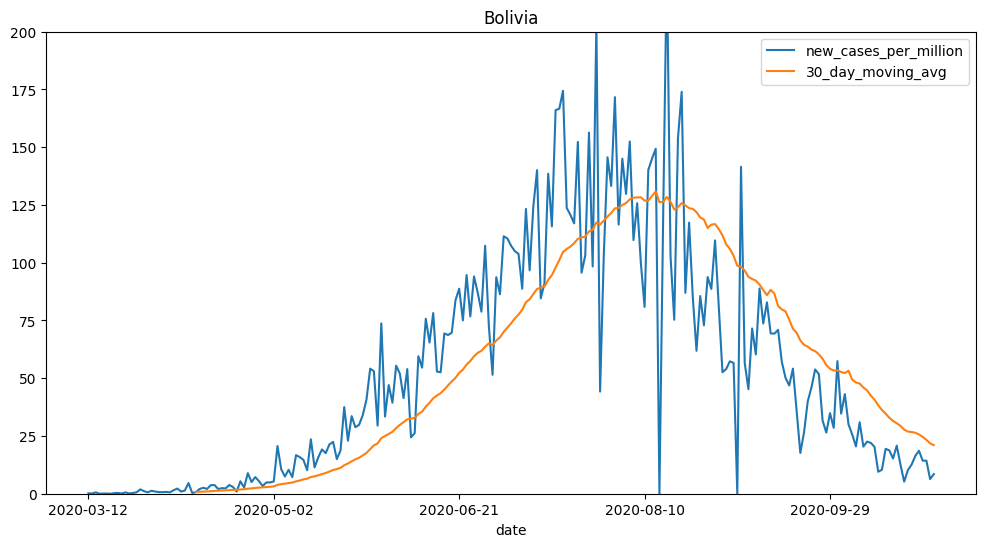

In [ ]:
# Most restrictive lockdown measures
plot_covid_data('Bolivia', 'new_cases_per_million', True)

So, we see that Sweden had the least restrictive lockdown, and the rate of new cases is higher than the moving average reference line.

Where as, in Bolivia which regualrly went on lockdowns, the rate of new cases is on a decline and the line seems to be below the moving average reference line.

How Does Median Age Effect Death Rate?

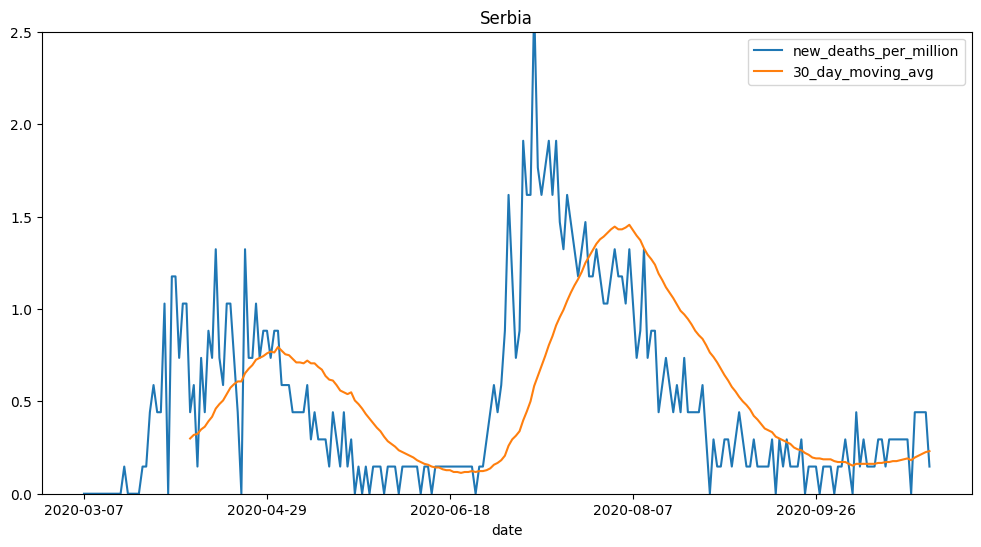

In [ ]:
# Country with lowest median age
plot_covid_data('Serbia', 'new_deaths_per_million', True, 2.5)


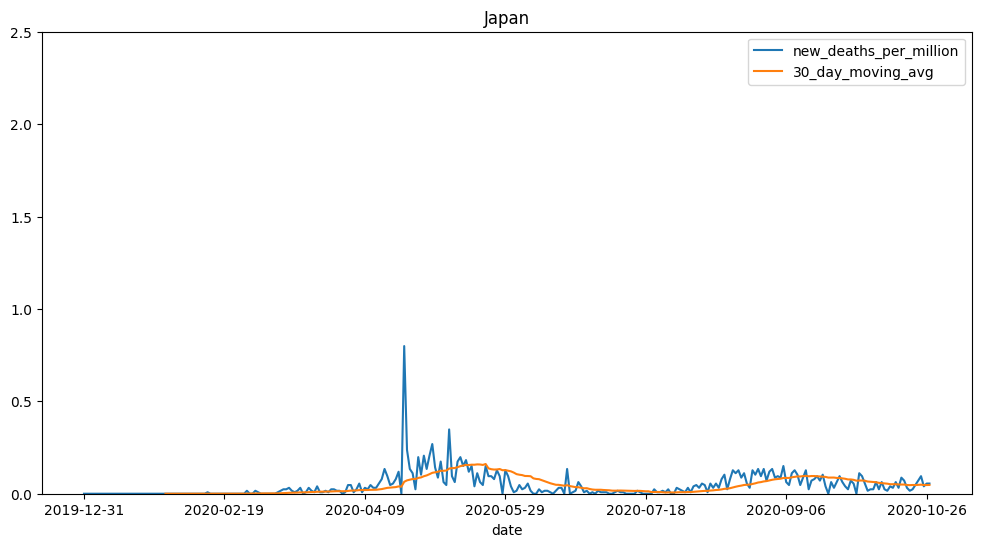

In [ ]:
# Country with highest median age
plot_covid_data('Japan', 'new_deaths_per_million', True, 2.5)

We observe, that Serbia, which has a Low Median Age, reported more deaths per million than compared to a country like Japan, where it has the high Median Age.

So does this mean, there is no relation of Age(Median Age) with deaths due to covid? - No we cant conclude that, this is the case while comparing Japan and Bolivia. There maybe N number of factors like healthcare, infrastructure or others.


How Does Obesity Effect Death Rate?

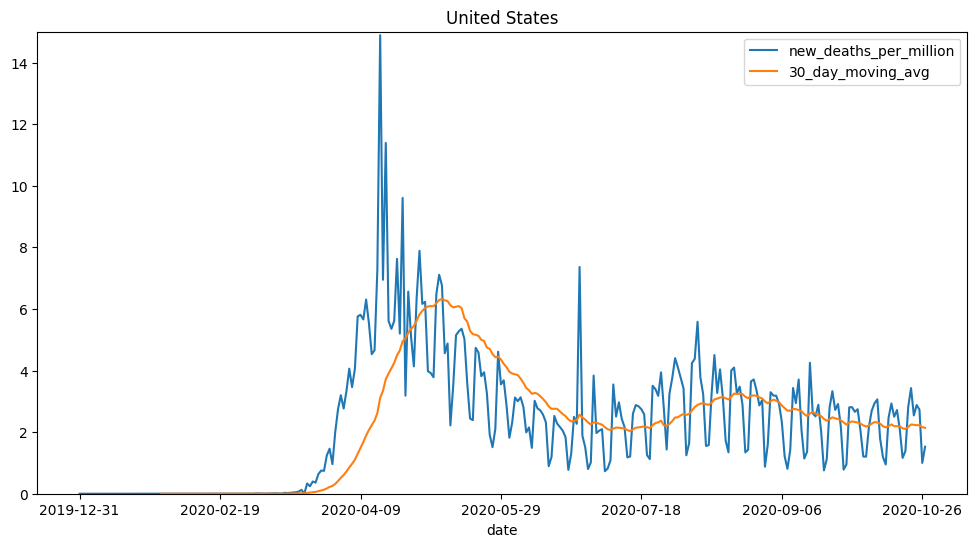

In [ ]:
# Countries with highest percentages
plot_covid_data('United States', 'new_deaths_per_million', True, 15)

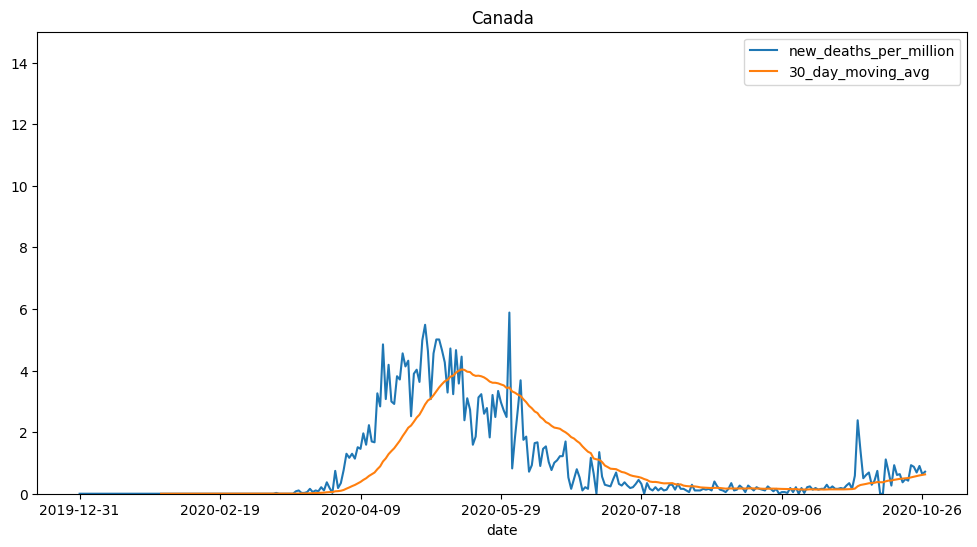

In [ ]:
plot_covid_data('Canada', 'new_deaths_per_million', True, 15)

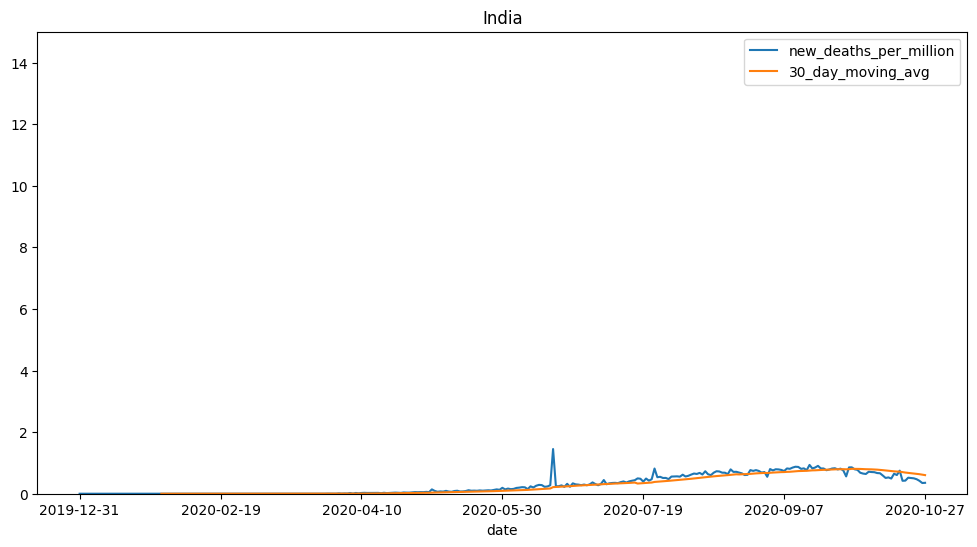

In [ ]:
# 2 countries with lowest percentages
plot_covid_data('India', 'new_deaths_per_million', True, 15)


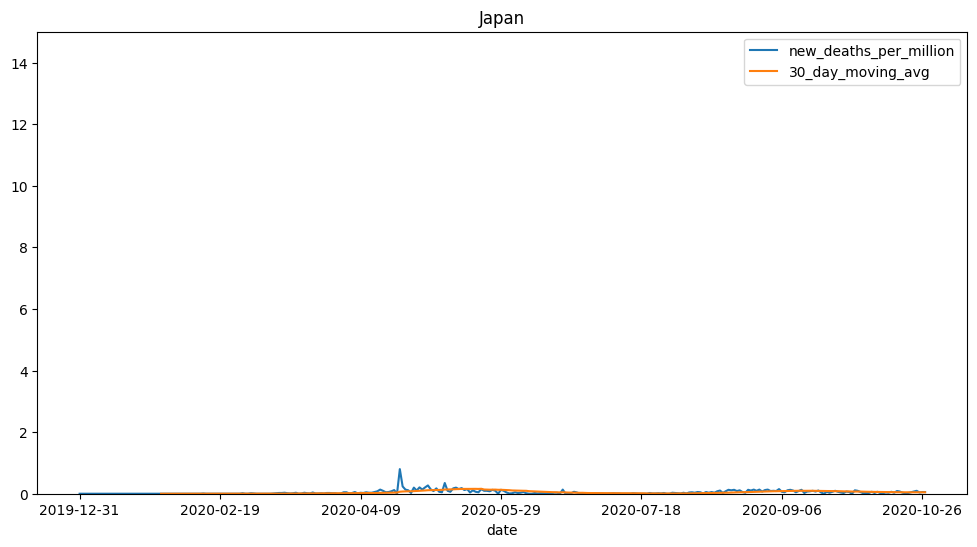

In [ ]:
plot_covid_data('Japan', 'new_deaths_per_million', True, 15)

We observe that Countries with High Obesity like USA and Canada have higher rate of deaths per million, where as countries like India and Japan have lower rate of deaths per million

How Does Diabetes Prevalence Effect Death?

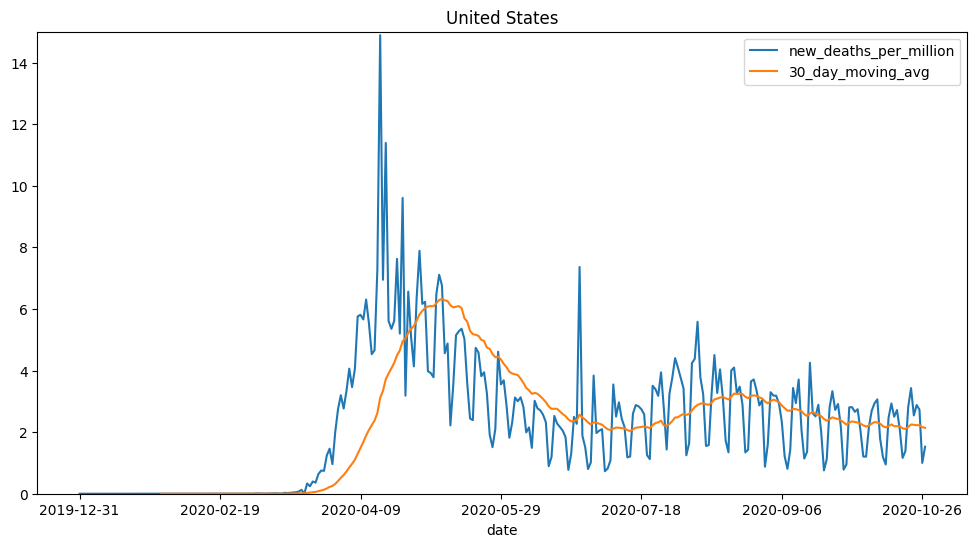

In [ ]:
# Country with highest percentage
plot_covid_data('United States', 'new_deaths_per_million', True, 15)

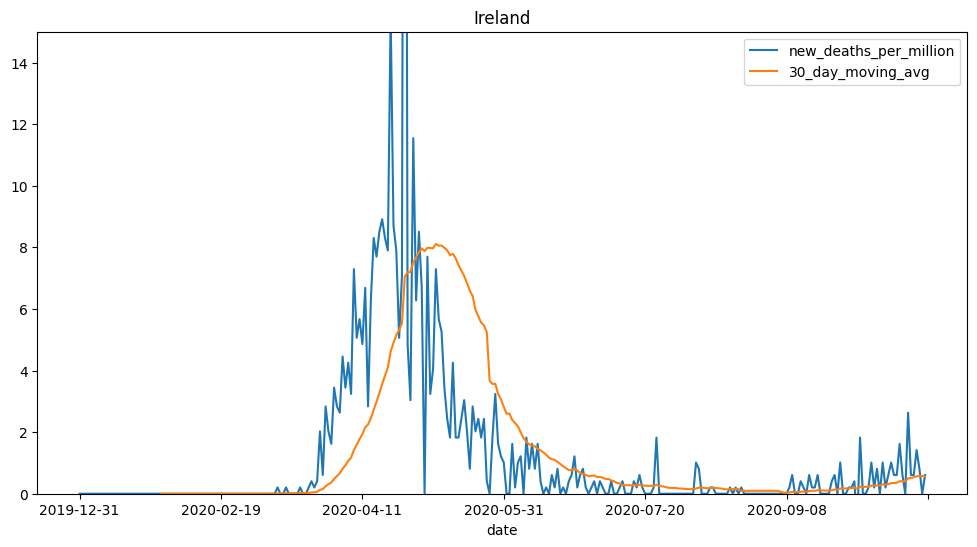

In [ ]:
# Country with lowest percentage
plot_covid_data('Ireland', 'new_deaths_per_million', True, 15)

The Curve is stating the Flatten for Ireland (a country with low diabetes rate), where as USA reports more deaths and still peaks over the Moving average line

Does More Testing Slow Deathrate?

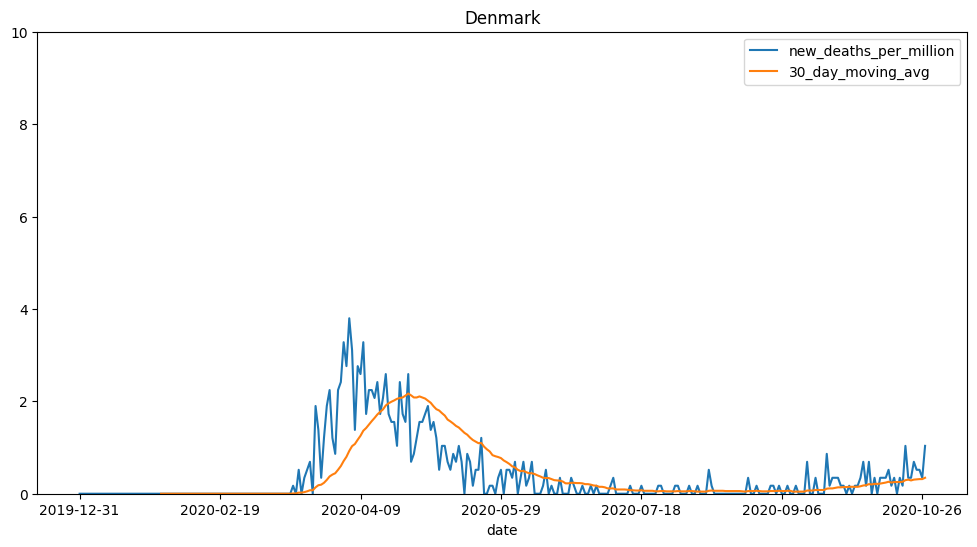

In [ ]:
# Country with highest percentage
plot_covid_data('Denmark', 'new_deaths_per_million', True, 10)


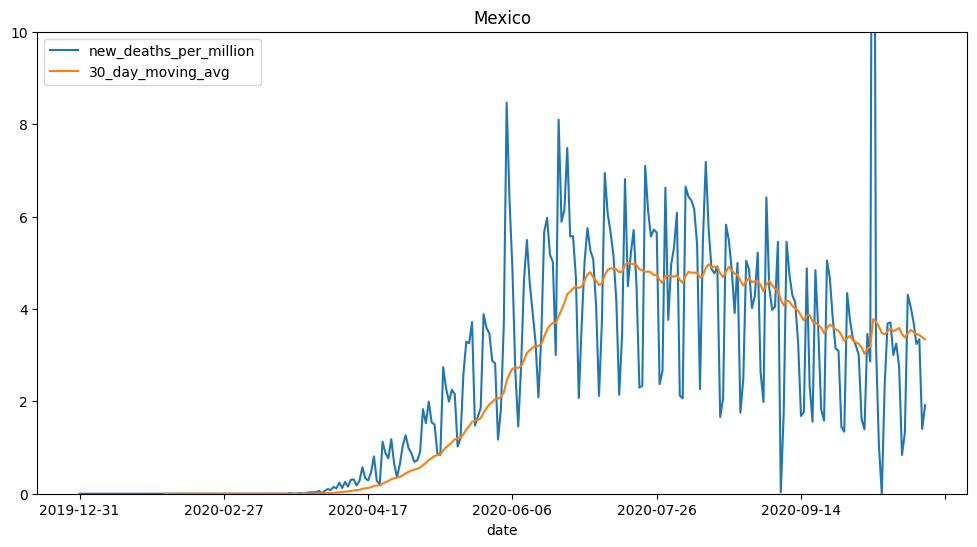

In [ ]:
# Country with lowest percentage
plot_covid_data('Mexico', 'new_deaths_per_million', True, 10)

We observe Denmark is performing better than Mexico. Denmark performed more testing, which has allowed them to quarantine/isolate more people which resulted in flattening the curve.

**Crearing a more flexible function to handle all Countries**

In [ ]:
# Receives date and column of interest for every country as a dataframe
def scatter_plot(date, col1, col2):
    total_country_df = pd.DataFrame()  #empty dataframe
    countries = owid_df['location'].unique() #unique list of countries
    temp_df_list = [] # create a list to hold the temporary dataframes

    for c in countries:
        # Get country specific data and append to main dataframe
        temp_df = owid_df[(owid_df['location'] == c) & (owid_df['date'] == date)][['date','location',col1,col2]]
        temp_df_list.append(temp_df)

    total_country_df = pd.concat(temp_df_list, ignore_index = True).fillna(0)
    # concatenate all the dataframes in the list. Also fill all null values with Zero.
    total_country_df.set_index('date',inplace = True)

    # Create Plotly scatter plot
    fig = px.scatter(data_frame=total_country_df, x=col1,
                     y=col2, color="location", trendline="ols", size = col2,
                 hover_data=['location'])
    fig.show(renderer="colab")

    #return total_country_df #retuning the formed dataframe as well

Harnessing the Power Of Plotly, to create a scatter plot to plot various combinations. It is also intercative in nature.

In [ ]:
scatter_plot('2020-10-27', 'aged_70_older','total_deaths_per_million')

In [ ]:
scatter_plot('2020-10-27', 'median_age','total_deaths_per_million')

In [ ]:
scatter_plot('2020-10-27', 'diabetes_prevalence','total_deaths_per_million')

In [ ]:
scatter_plot('2020-10-27', 'male_smokers','total_deaths_per_million')

**Thank YOU**